In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import src.modeling as modeling

# Simulate data

In [2]:
# Define the task environment
env_name = 'ProbabilisticReversalEnvironment'
states = [0]
actions = [0, 1]
n_trials_per_episode = 50
n_episodes = 10
p_reward_correct = 0.8
p_reward_incorrect = 0.2
env_class = getattr(modeling, env_name)
env = env_class(states, actions, n_trials_per_episode, n_episodes, p_reward_correct, p_reward_incorrect)

# Define the generative model
model_name = 'StickyRLModel'
param_names = ['alpha', 'beta', 'stickiness']
param_bounds = [[1e-6, 1], [1e-6, 10], [-1, 1]]
model_class = getattr(modeling, model_name)
agent = model_class(env, param_names, param_bounds)

# Simulate data
n_participants = 10
n_iters = 1
data = agent.simulate(n_participants, n_iters)


# Fit models

In [ ]:
# Define the models to fit
model_names = ['RLModel', 'StickyRLModel']
param_names = [['alpha', 'beta'], ['alpha', 'beta', 'stickiness']]
param_bounds = [[[1e-6, 1], [1e-6, 10]], [[1e-6, 1], [1e-6, 10], [-1, 1]]]

# Define the optimization method
optimization_method = 'mle'

# Define the optimizer
optimizer = modeling.Optimizer()
# Fit the models
best_params_all, best_nllh_all = optimizer.fit(env, data, model_names, param_names, param_bounds, optimization_method)

Fitting 2 models with 10 participants using mle method
Using at most 8 parallel processes


# Compute fit metrics

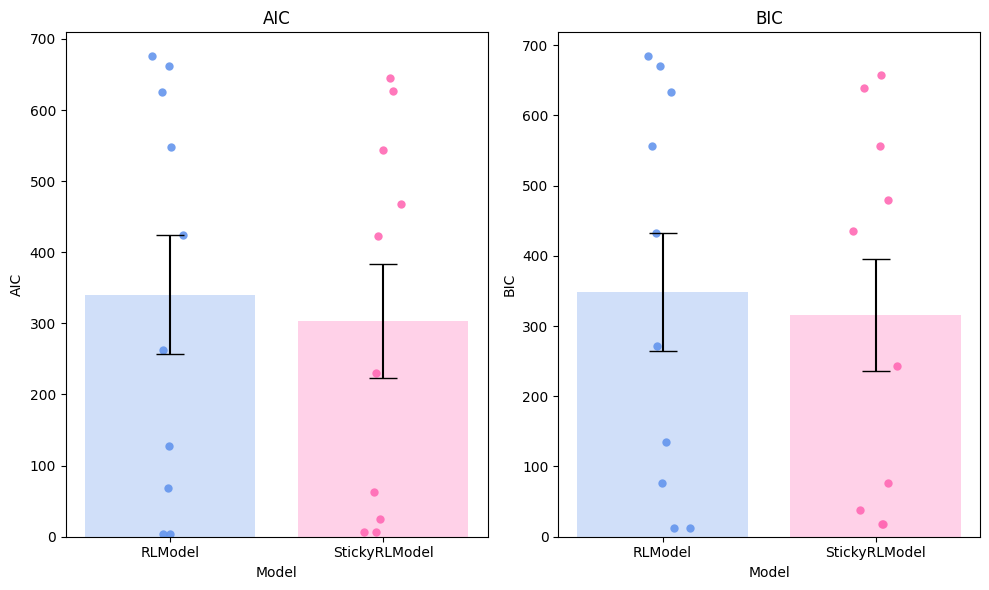

In [ ]:
n_params = np.array([len(param_names[0]), len(param_names[1])])
colors = ['cornflowerblue', 'hotpink']

# Plot results
plt.figure(figsize=(10, 6))
for metric_i, metric in enumerate(["AIC", "BIC"]):
    plt.subplot(1, 2, metric_i + 1)
    scores = optimizer.compute_fit_metric(best_nllh_all, n_params, data, metric)
    mean_scores = np.mean(scores, axis=1)
    sem_scores = np.std(scores, axis=1) / np.sqrt(scores.shape[1])
    plt.bar(model_names, mean_scores, color=colors, yerr=sem_scores, capsize=10, alpha=0.3)

    for m in range(len(model_names)):
        plt.scatter(m+np.random.normal(0, 0.05, size=scores[m].shape), scores[m], linewidth=0, alpha=0.9, color=colors[m])

    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric}')
plt.tight_layout()
plt.show()
